In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df

,Chirps,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
#detect outliers using iqr approach 

iqr = df.Chirps.quantile(0.75)  - df.Chirps.quantile(0.25)
upper_threshold = df.Chirps.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Chirps.quantile(0.75) - (1.5 * iqr)
print(upper_threshold , lower_threshold)

19.699999999999996 14.6


In [ ]:
df.isna()

,Chirps,Ground Temperature
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
df.isnull()

,Chirps,Ground Temperature
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
df.isnull().sum()

Chirps                0
Ground Temperature    0
dtype: int64

In [ ]:
#drop duplicates

df = df.drop_duplicates()

In [ ]:
df.dtypes

Chirps                float64
Ground Temperature    float64
dtype: object

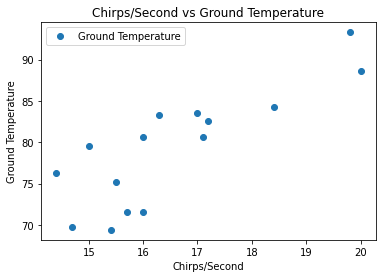

In [ ]:
#plot the data

df.plot( x = 'Chirps' , y = 'Ground Temperature' , style = 'o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [ ]:
df.corr()

,Chirps,Ground Temperature
Chirps,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
# split the data

X = df.loc[:,['Chirps']].values
y = df.loc[:,['Ground Temperature']].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size = 0.3)

In [ ]:
y_test

array([[83.5],
       [79.6],
       [69.4],
       [88.6],
       [80.6]])

In [ ]:
y_train

array([[69.7],
       [84.3],
       [93.3],
       [71.6],
       [83.3],
       [76.3],
       [71.6],
       [75.2],
       [80.6],
       [82.6]])

In [ ]:
X_test

array([[17. ],
       [15. ],
       [15.4],
       [20. ],
       [17.1]])

In [ ]:
X_train

array([[14.7],
       [18.4],
       [19.8],
       [15.7],
       [16.3],
       [14.4],
       [16. ],
       [15.5],
       [16. ],
       [17.2]])

In [ ]:
#Modeling 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , y_train)


LinearRegression()

In [ ]:
print(regressor.intercept_)

[16.62022654]


In [ ]:
print(regressor.coef_)

[[3.79449838]]


In [ ]:
#predicting using random values
regressor.predict([[23]])

array([[103.89368932]])

array([[76.3],
       [69.4],
       [84.3],
       [71.6],
       [88.6]])

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([[71.8701326 ],
       [75.81667017],
       [87.65628289],
       [77.00063145],
       [93.970743  ]])

In [ ]:
#R2 score

from sklearn import metrics 
regressor.score(X_test , y_test)

0.517981276749591

In [ ]:
regressor.predict([[18]])

array([[84.92119741]])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
#detect outliers
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
ut = df.Brain.quantile(0.75) +(1.5 * iqr)
lt = df.Brain.quantile(0.75) - (1.5 * iqr)
print(ut , lt)

119.60625 -23.20125


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

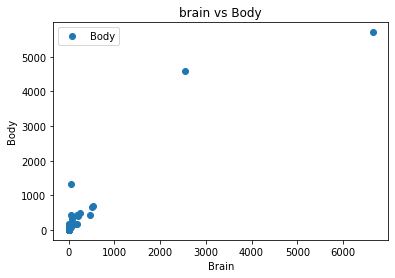

In [ ]:
df.plot(x = 'Brain' , y = 'Body' , style = 'o')
plt.title('brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
# split the data

X = df.loc[:,['Brain']].values
y = df.loc[:,['Body']].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size = 0.3)

In [ ]:
X_train 

array([[6.200e+01],
       [3.385e+00],
       [4.800e-01],
       [2.300e-02],
       [4.190e+00],
       [2.547e+03],
       [9.000e-01],
       [3.633e+01],
       [3.300e+00],
       [5.210e+02],
       [5.550e+01],
       [9.200e-01],
       [5.290e+02],
       [8.500e+01],
       [1.400e+00],
       [4.250e-01],
       [2.500e+00],
       [1.483e+01],
       [4.650e+02],
       [6.000e+01],
       [3.500e+00],
       [5.500e-01],
       [1.200e-01],
       [3.500e+01],
       [1.000e+02],
       [1.700e+00],
       [1.410e+00],
       [3.600e+00],
       [1.350e+00],
       [6.654e+03],
       [1.620e+00],
       [1.600e+02],
       [2.766e+01],
       [7.850e-01],
       [4.235e+00],
       [1.000e-02],
       [2.500e+02],
       [6.000e-02],
       [4.800e-02],
       [1.010e-01],
       [2.300e-02],
       [7.500e-02],
       [4.050e+00]])

In [ ]:
X_test

array([[1.055e+01],
       [2.800e-01],
       [3.000e+00],
       [1.000e+01],
       [6.800e+00],
       [2.070e+02],
       [7.500e-01],
       [1.220e-01],
       [1.871e+02],
       [2.000e-01],
       [3.500e+00],
       [1.920e+02],
       [2.000e+00],
       [1.000e+00],
       [1.040e+00],
       [5.216e+01],
       [1.040e-01],
       [5.000e-03],
       [4.288e+00]])

In [ ]:
y_train

array([[1.320e+03],
       [4.450e+01],
       [1.550e+01],
       [3.000e-01],
       [5.800e+01],
       [4.603e+03],
       [2.600e+00],
       [1.195e+02],
       [2.560e+01],
       [6.550e+02],
       [1.750e+02],
       [5.700e+00],
       [6.800e+02],
       [3.250e+02],
       [1.250e+01],
       [6.400e+00],
       [1.210e+01],
       [9.820e+01],
       [4.230e+02],
       [8.100e+01],
       [3.900e+00],
       [2.400e+00],
       [1.000e+00],
       [5.600e+01],
       [1.570e+02],
       [6.300e+00],
       [1.750e+01],
       [2.100e+01],
       [8.100e+00],
       [5.712e+03],
       [1.140e+01],
       [1.690e+02],
       [1.150e+02],
       [3.500e+00],
       [5.040e+01],
       [2.500e-01],
       [4.900e+02],
       [1.000e+00],
       [3.300e-01],
       [4.000e+00],
       [4.000e-01],
       [1.200e+00],
       [1.700e+01]])

In [ ]:
y_test

array([[1.795e+02],
       [1.900e+00],
       [2.500e+01],
       [1.150e+02],
       [1.790e+02],
       [4.060e+02],
       [1.230e+01],
       [3.000e+00],
       [4.190e+02],
       [5.000e+00],
       [1.080e+01],
       [1.800e+02],
       [1.230e+01],
       [6.600e+00],
       [5.500e+00],
       [4.400e+02],
       [2.500e+00],
       [1.400e-01],
       [3.920e+01]])

In [ ]:
#Modeling 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , y_train)


LinearRegression()

In [ ]:
print(regressor.intercept_)

[99.83082824]


In [ ]:
print(regressor.coef_)

[[0.96356414]]


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [2]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [4]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [5]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [6]:
df = df.drop_duplicates()

In [7]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [8]:
iqr = df['Year'].quantile(0.75) - df['Year'].quantile(0.25)
upper_threshold = df['Year'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Year'].quantile(0.75) - (1.5 * iqr)
upper_threshold , lower_threshold

(23.0, -1.0)

In [9]:
iqr = df['YSdeg'].quantile(0.75) - df['YSdeg'].quantile(0.25)
upper_threshold = df['YSdeg'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['YSdeg'].quantile(0.75) - (1.5 * iqr)
upper_threshold , lower_threshold

(48.0, -1.5)

In [10]:
iqr = df['Salary'].quantile(0.75) - df['Salary'].quantile(0.25)
upper_threshold = df['Salary'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['Salary'].quantile(0.75) - (1.5 * iqr)
upper_threshold , lower_threshold

(40776.125, 13740.875)

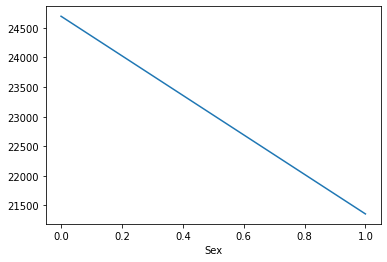

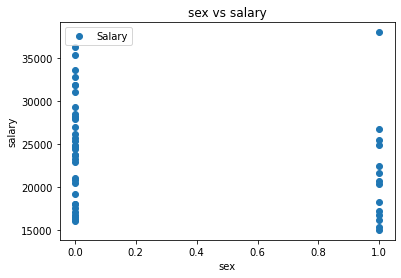

In [11]:
df.groupby('Sex')['Salary'].mean().plot()
import matplotlib.pyplot as plt
df.plot(x = 'Sex' , y = 'Salary' , style = 'o')
plt.title('sex vs salary')
plt.xlabel('sex')
plt.ylabel('salary')
plt.show()

In [12]:
df[['Sex' , 'Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


**There** is low linear relation between Sex and Salary . 

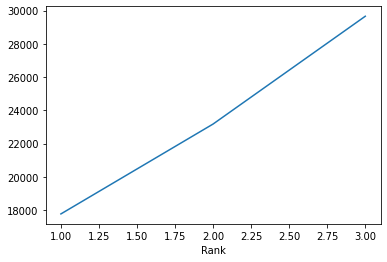

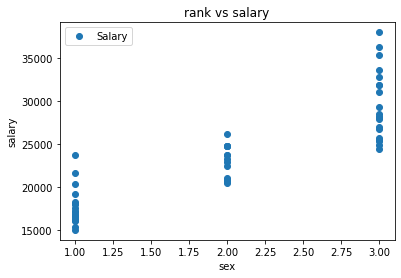

In [13]:
df.groupby('Rank')['Salary'].mean().plot()
import matplotlib.pyplot as plt
df.plot(x = 'Rank' , y = 'Salary' , style = 'o')
plt.title('rank vs salary')
plt.xlabel('sex')
plt.ylabel('salary')
plt.show()

In [14]:
df[['Rank' , 'Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


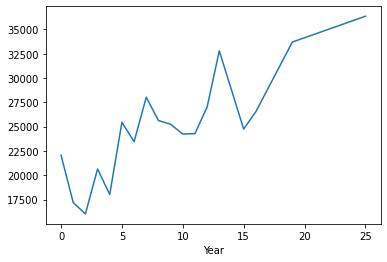

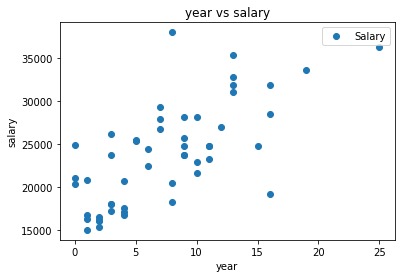

In [15]:
df.groupby('Year')['Salary'].mean().plot()
import matplotlib.pyplot as plt
df.plot(x = 'Year' , y = 'Salary' , style = 'o')
plt.title('year vs salary')
plt.xlabel('year')
plt.ylabel('salary')
plt.show()

In [16]:
df[['Year' , 'Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


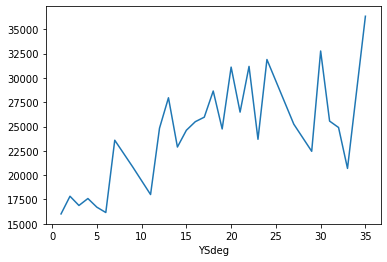

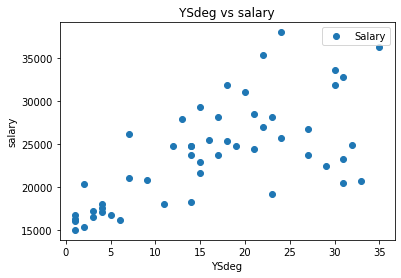

In [17]:
df.groupby('YSdeg')['Salary'].mean().plot()
import matplotlib.pyplot as plt
df.plot(x = 'YSdeg' , y = 'Salary' , style = 'o')
plt.title('YSdeg vs salary')
plt.xlabel('YSdeg')
plt.ylabel('salary')
plt.show()

In [18]:
df[['YSdeg' , 'Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


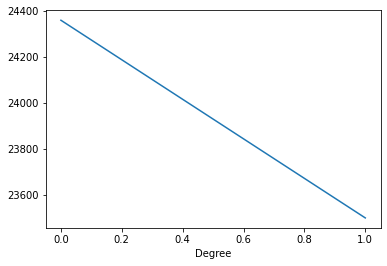

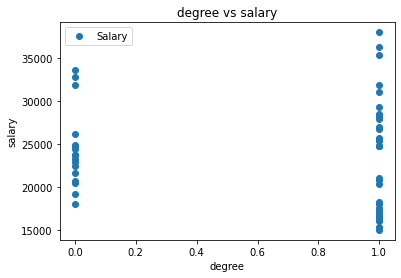

In [19]:
df.groupby('Degree')['Salary'].mean().plot()
import matplotlib.pyplot as plt
df.plot(x = 'Degree' , y = 'Salary' , style = 'o')
plt.title('degree vs salary')
plt.xlabel('degree')
plt.ylabel('salary')
plt.show()

In [20]:
df[['Degree' , 'Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


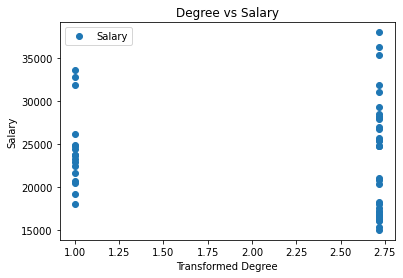

,transformed,Salary
transformed,1.000000,-0.069726
Salary,-0.069726,1.000000


In [27]:
import numpy as np
df['transformed'] = np.exp(df['Degree']) # transformation
df.plot(x='transformed', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Transformed Degree')
plt.ylabel('Salary')
plt.show()
df[['transformed','Salary']].corr()

Have tried all type of tranformations to get linear relationship, but there is no linear relation between degree and salary. 

In [28]:
X = df[['Sex' , 'Rank' , 'Year' , 'YSdeg']].values
y = df['Salary'].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank' ,' Year' , 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df


,Coefficient
Sex,413.548228
Rank,4454.636286
Year,2737.649374
YSdeg,-691.921717


In [36]:
regressor.predict(scaler.transform(np.array([[0,3, 2010 , 20 ]])))

array([1043307.51722799])

In [37]:
regressor.intercept_ # c 

23978.146341463416

In [38]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,23725,20957.564225
1,24900,24507.102712
2,23300,24075.698163
3,31909,32621.933288
4,24750,26906.829160
5,16244,15873.692113
6,28200,29140.370287
7,18000,16218.045798
8,20300,16233.179149
9,18304,19485.214564


In [39]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.834083822344431
